In [1]:
import pandas as pd
import numpy as np

# **Questions**

1. Which have been the five OECD countries that received the highest inflow of immigrants during 2010-2020? 

2. Which are the top 5 OECD countries that have had the highest immigrants outflows rates during 2010-2020?  

3. Which are the OECD countries with the highest nationality acquisition rates for the years 2010-2020?

In [2]:
data = pd.read_csv('../data/clean/immigration_OECD.csv')
data

,Country of birth/nationality,VAR,Variable,Country,Year,Value
0,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2000,887.0
1,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2001,456.0
2,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2002,660.0
3,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2003,1015.0
4,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2004,1340.0
...,...,...,...,...,...,...
439513,Stateless,B15,Stock of foreign population by nationality,Türkiye,2016,82.0
439514,Stateless,B15,Stock of foreign population by nationality,Türkiye,2017,132.0
439515,Stateless,B15,Stock of foreign population by nationality,Türkiye,2018,170.0
439516,Stateless,B15,Stock of foreign population by nationality,Türkiye,2019,320.0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,439518.0,2011.320014,5.868698,2000.0,2007.0,2012.0,2016.0,2021.0
Value,439518.0,14771.224996,366743.032206,-18.0,1.0,31.0,489.0,45273000.0


In [4]:
data['Variable'].value_counts()

Variable
Inflows of foreign population by nationality                   106723
Acquisition of nationality by country of former nationality     97573
Stock of foreign population by nationality                      84693
Outflows of foreign population by nationality                   76475
Stock of foreign-born population by country of birth            74054
Name: count, dtype: int64

1. Which have been the five OECD countries that received the highest inflow of immigrants during 2010-2020? 

In [5]:
immi = data.copy().set_index('Variable')
immi = immi.loc[['Inflows of foreign population by nationality']]
immi = immi[immi['Year'] == 2020]
immi

,Country of birth/nationality,VAR,Country,Year,Value
Variable,,,,,
Inflows of foreign population by nationality,Afghanistan,B11,Australia,2020,2229.0
Inflows of foreign population by nationality,Afghanistan,B11,Austria,2020,1492.0
Inflows of foreign population by nationality,Afghanistan,B11,Belgium,2020,3163.0
Inflows of foreign population by nationality,Afghanistan,B11,Canada,2020,1660.0
Inflows of foreign population by nationality,Afghanistan,B11,Czech Republic,2020,13.0
...,...,...,...,...,...
Inflows of foreign population by nationality,Nicaragua,B11,Latvia,2020,1.0
Inflows of foreign population by nationality,Guam,B11,Latvia,2020,0.0
Inflows of foreign population by nationality,Philippines,B11,Latvia,2020,3.0


In [6]:
max_immi = immi.copy()


In [7]:
max_immi1 = max_immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = ['sum'] )
display(max_immi1)

,,sum
,,Value
Country,Year,
Australia,2020,274810.0
Austria,2020,241836.0
Belgium,2020,202405.0
Canada,2020,368880.0
Chile,2020,303836.0
Czech Republic,2020,107334.0
Denmark,2020,75464.0
Estonia,2020,15176.0


In [8]:
max_immi1.columns

MultiIndex([('sum', 'Value')],
           )

In [9]:
max_country = max_immi1.idxmax() #getting index of top country
max_country

sum  Value    (Germany, 2020)
dtype: object

In [10]:
max_immi2 = max_immi1.sort_values(by = ('sum', 'Value'), ascending=False).iloc[0:5]

max_immi2

,,sum
,,Value
Country,Year,
Germany,2020,1973054.0
United States,2020,1414349.0
Spain,2020,805654.0
Korea,2020,466220.0
Japan,2020,441002.0


In [11]:
data['Variable'].value_counts()

Variable
Inflows of foreign population by nationality                   106723
Acquisition of nationality by country of former nationality     97573
Stock of foreign population by nationality                      84693
Outflows of foreign population by nationality                   76475
Stock of foreign-born population by country of birth            74054
Name: count, dtype: int64

In [12]:
def top_5(data: pd.DataFrame, variable: str, year: int=2010)-> pd.DataFrame:

    """"
    This function inputs a data frame, a year from 2010 until 20121, and variable = 'Inflows of foreign population by nationality', 'Acquisition of nationality by country of former nationality',
    'Stock of foreign population by nationality', 'Outflows of foreign population by nationality', 'Stock of foreign-born population by country of birth'    
    Depending on Gender and the year selected the function returns a data frame 
    including the columns = 'Country', 'Year', and 'Value' corresponding to
    every single country included in the data frame  and its total number of immigrants per year.

    """

    immi = data.copy().set_index('Variable')
    immi = immi.loc[[variable]]
    immi = immi[immi['Year'] == year]

       

    max_immi1 = immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
            

    max_immi2 = max_immi1.sort_values(by = ('Value', 'sum'), ascending=False).iloc[0:5]
    max_immi2

    

    return max_immi2

In [13]:
data_2010= top_5(data, 'Inflows of foreign population by nationality', 2010)
data_2010

,,Value
,,sum
Country,Year,
United States,2010,2087721.0
Germany,2010,1358364.0
Italy,2010,848950.0
United Kingdom,2010,821000.0
Spain,2010,660420.0


In [14]:
data_2011 = top_5(data, 'Inflows of foreign population by nationality',  2011)
data_2011


,,Value
,,sum
Country,Year,
United States,2011,2126346.0
Germany,2011,1674171.0
United Kingdom,2011,888000.0
Italy,2011,705799.0
Spain,2011,671519.0


In [15]:
data_2012 = top_5(data, 'Inflows of foreign population by nationality',  2012)
data_2012

,,Value
,,sum
Country,Year,
United States,2012,2065313.0
Germany,2012,1920476.0
United Kingdom,2012,742000.0
Italy,2012,640076.0
Japan,2012,607608.0


In [16]:
data_2013 = top_5(data, 'Inflows of foreign population by nationality',  2013)
data_2013

,,Value
,,sum
Country,Year,
Germany,2013,2201352.0
United States,2013,1983160.0
United Kingdom,2013,804000.0
Korea,2013,720937.0
Japan,2013,613203.0


In [17]:
data_2014 = top_5(data, 'Inflows of foreign population by nationality',  2014)
data_2014

,,Value
,,sum
Country,Year,
Germany,2014,2657504.0
United States,2014,2035094.0
United Kingdom,2014,983000.0
Korea,2014,814108.0
Japan,2014,672823.0


In [18]:
data_2015 = top_5(data, 'Inflows of foreign population by nationality',  2015)
data_2015

,,Value
,,sum
Country,Year,
Germany,2015,3975108.0
United States,2015,2103870.0
United Kingdom,2015,948000.0
Japan,2015,781986.0
Korea,2015,745858.0


In [19]:
data_2016 = top_5(data, 'Inflows of foreign population by nationality',  2016)
data_2016

,,Value
,,sum
Country,Year,
Germany,2016,3415809.0
United States,2016,2369212.0
Japan,2016,854778.0
United Kingdom,2016,823000.0
Korea,2016,804392.0


In [20]:
data_2017 = top_5(data, 'Inflows of foreign population by nationality',  2017)
data_2017

,,Value
,,sum
Country,Year,
Germany,2017,2745154.0
United States,2017,2256386.0
Japan,2017,949486.0
United Kingdom,2017,946000.0
Spain,2017,907385.0


In [21]:
data_2018 = top_5(data, 'Inflows of foreign population by nationality',  2018)
data_2018

,,Value
,,sum
Country,Year,
Germany,2018,2745106.0
United States,2018,2194811.0
Spain,2018,1119349.0
Japan,2018,1038903.0
Korea,2018,990137.0


In [22]:
data_2019 = top_5(data, 'Inflows of foreign population by nationality',  2019)
data_2019

,,Value
,,sum
Country,Year,
Germany,2019,2668348.0
United States,2019,2063219.0
Spain,2019,1328551.0
Japan,2019,1183371.0
Türkiye,2019,1153793.0


In [23]:
data_2020 = top_5(data, 'Inflows of foreign population by nationality',  2020)
data_2020

,,Value
,,sum
Country,Year,
Germany,2020,1973054.0
United States,2020,1414349.0
Spain,2020,805654.0
Korea,2020,466220.0
Japan,2020,441002.0


In [24]:
dfs = [data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019, data_2020]

result = pd.concat(dfs).reset_index()

result

,Country,Year,Value
,,,sum
0,United States,2010,2087721.0
1,Germany,2010,1358364.0
2,Italy,2010,848950.0
3,United Kingdom,2010,821000.0
4,Spain,2010,660420.0
5,United States,2011,2126346.0
6,Germany,2011,1674171.0
7,United Kingdom,2011,888000.0
8,Italy,2011,705799.0


In [25]:
result.dtypes

Country          object
Year              int64
Value    sum    float64
dtype: object

In [26]:
result.columns = result.columns.droplevel(1)

In [27]:
result.columns

Index(['Country', 'Year', 'Value'], dtype='object')

Graphic "Inflows of Foreign-Population to Top 10 OECD countries 2010 - 2020"

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


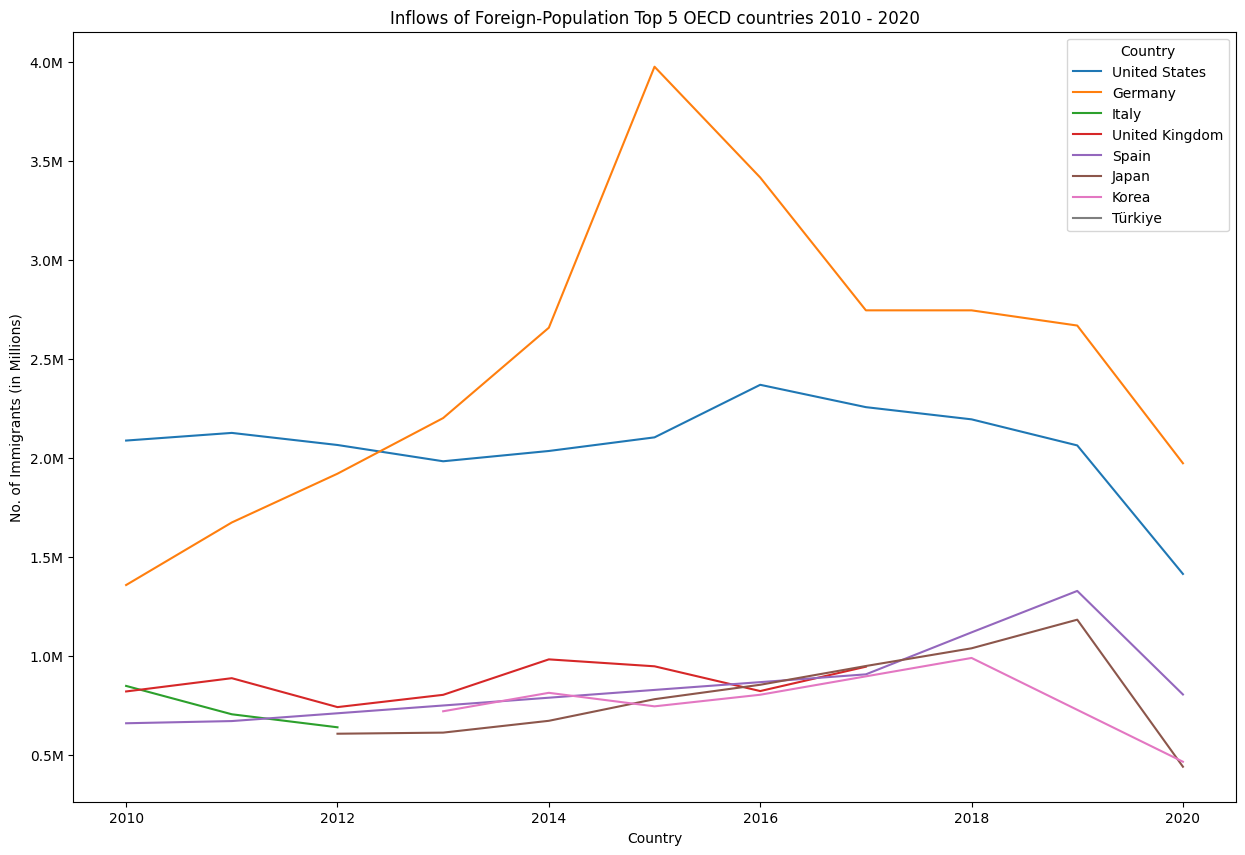

In [80]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=result, x='Year', y='Value', hue='Country', ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Inflows of Foreign-Population Top 5 OECD countries 2010 - 2020")
plt.show()

Which are the top 5 OECD countries that have had the highest immigrants outflows rates?  How are the nationality acquisition rates behaving?

In [30]:
outflows = data.copy().set_index('Variable')
outflows = outflows.loc[['Outflows of foreign population by nationality']]
outflows = outflows[outflows['Year'] == 2020]
outflows

,Country of birth/nationality,VAR,Country,Year,Value
Variable,,,,,
Outflows of foreign population by nationality,Afghanistan,B12,Austria,2020,1335.0
Outflows of foreign population by nationality,Afghanistan,B12,Belgium,2020,578.0
Outflows of foreign population by nationality,Afghanistan,B12,Czech Republic,2020,52.0
Outflows of foreign population by nationality,Afghanistan,B12,Denmark,2020,35.0
Outflows of foreign population by nationality,Afghanistan,B12,Finland,2020,13.0
...,...,...,...,...,...
Outflows of foreign population by nationality,Marshall Islands,B12,Latvia,2020,0.0
Outflows of foreign population by nationality,Panama,B12,Latvia,2020,0.0
Outflows of foreign population by nationality,Hungary,B12,Latvia,2020,0.0


In [31]:
outflows1 = outflows[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = ['sum'] )
            

outflows2 = outflows1.sort_values(by = ('sum', 'Value'), ascending=False).iloc[0:5]
outflows2

,,sum
,,Value
Country,Year,
Germany,2020,1487220.0
Korea,2020,723034.0
Spain,2020,354246.0
Japan,2020,345922.0
Austria,2020,158350.0


In [32]:
data_out_2010 = top_5(data, 'Outflows of foreign population by nationality', 2010)
data_out_2010

,,Value
,,sum
Country,Year,
Germany,2010,1054083.0
Spain,2010,726374.0
Japan,2010,485173.0
United Kingdom,2010,437000.0
Korea,2010,392133.0


In [33]:
data_out_2011 = top_5(data, 'Outflows of foreign population by nationality', 2011)
data_out_2011

,,Value
,,sum
Country,Year,
Germany,2011,1073308.0
Spain,2011,706950.0
Japan,2011,461608.0
Korea,2011,435375.0
United Kingdom,2011,363000.0


In [34]:
data_out_2012 = top_5(data, 'Outflows of foreign population by nationality', 2012)
data_out_2012

,,Value
,,sum
Country,Year,
Germany,2012,1152343.0
Spain,2012,778539.0
Korea,2012,580063.0
Japan,2012,438847.0
United Kingdom,2012,318000.0


In [35]:
data_out_2013 = top_5(data, 'Outflows of foreign population by nationality', 2013)
data_out_2013

,,Value
,,sum
Country,Year,
Germany,2013,1308848.0
Spain,2013,917722.0
Korea,2013,536161.0
Japan,2013,426456.0
United Kingdom,2013,321000.0


In [36]:
data_out_2014 = top_5(data, 'Outflows of foreign population by nationality', 2014)
data_out_2014

,,Value
,,sum
Country,Year,
Germany,2014,1523059.0
Spain,2014,639823.0
Korea,2014,541030.0
Japan,2014,425682.0
United Kingdom,2014,326000.0


In [37]:
data_out_2015 = top_5(data, 'Outflows of foreign population by nationality', 2015)
data_out_2015

,,Value
,,sum
Country,Year,
Germany,2015,1693948.0
Korea,2015,602001.0
Spain,2015,498371.0
Japan,2015,446864.0
United Kingdom,2015,315000.0


In [38]:
data_out_2016 = top_5(data, 'Outflows of foreign population by nationality', 2016)
data_out_2016

,,Value
,,sum
Country,Year,
Germany,2016,2142737.0
Korea,2016,649909.0
Spain,2016,474890.0
Japan,2016,466805.0
United Kingdom,2016,323000.0


In [39]:
data_out_2017 = top_5(data, 'Outflows of foreign population by nationality', 2017)
data_out_2017

,,Value
,,sum
Country,Year,
Germany,2017,1759503.0
Korea,2017,697393.0
Spain,2017,563817.0
Japan,2017,518151.0
Türkiye,2017,391166.0


In [40]:
data_out_2018 = top_5(data, 'Outflows of foreign population by nationality', 2018)
data_out_2018

,,Value
,,sum
Country,Year,
Germany,2018,1838719.0
Korea,2018,730194.0
Japan,2018,583835.0
Türkiye,2018,510560.0
Spain,2018,460354.0


In [41]:
data_out_2019 = top_5(data, 'Outflows of foreign population by nationality', 2019)
data_out_2019

,,Value
,,sum
Country,Year,
Germany,2019,1915351.0
Korea,2019,851081.0
Japan,2019,666779.0
Türkiye,2019,488577.0
Spain,2019,439703.0


In [42]:
data_out_2020 = top_5(data, 'Outflows of foreign population by nationality', 2020)
data_out_2020

,,Value
,,sum
Country,Year,
Germany,2020,1487220.0
Korea,2020,723034.0
Spain,2020,354246.0
Japan,2020,345922.0
Austria,2020,158350.0


In [43]:
dfs = [data_out_2010, data_out_2011, data_out_2012, data_out_2013, data_out_2014, data_out_2015, data_out_2016, data_out_2017, data_out_2018, data_out_2019, data_out_2020]

result_out = pd.concat(dfs).reset_index()

result_out

,Country,Year,Value
,,,sum
0,Germany,2010,1054083.0
1,Spain,2010,726374.0
2,Japan,2010,485173.0
3,United Kingdom,2010,437000.0
4,Korea,2010,392133.0
5,Germany,2011,1073308.0
6,Spain,2011,706950.0
7,Japan,2011,461608.0
8,Korea,2011,435375.0


In [44]:
result_out.columns = result_out.columns.droplevel(1)

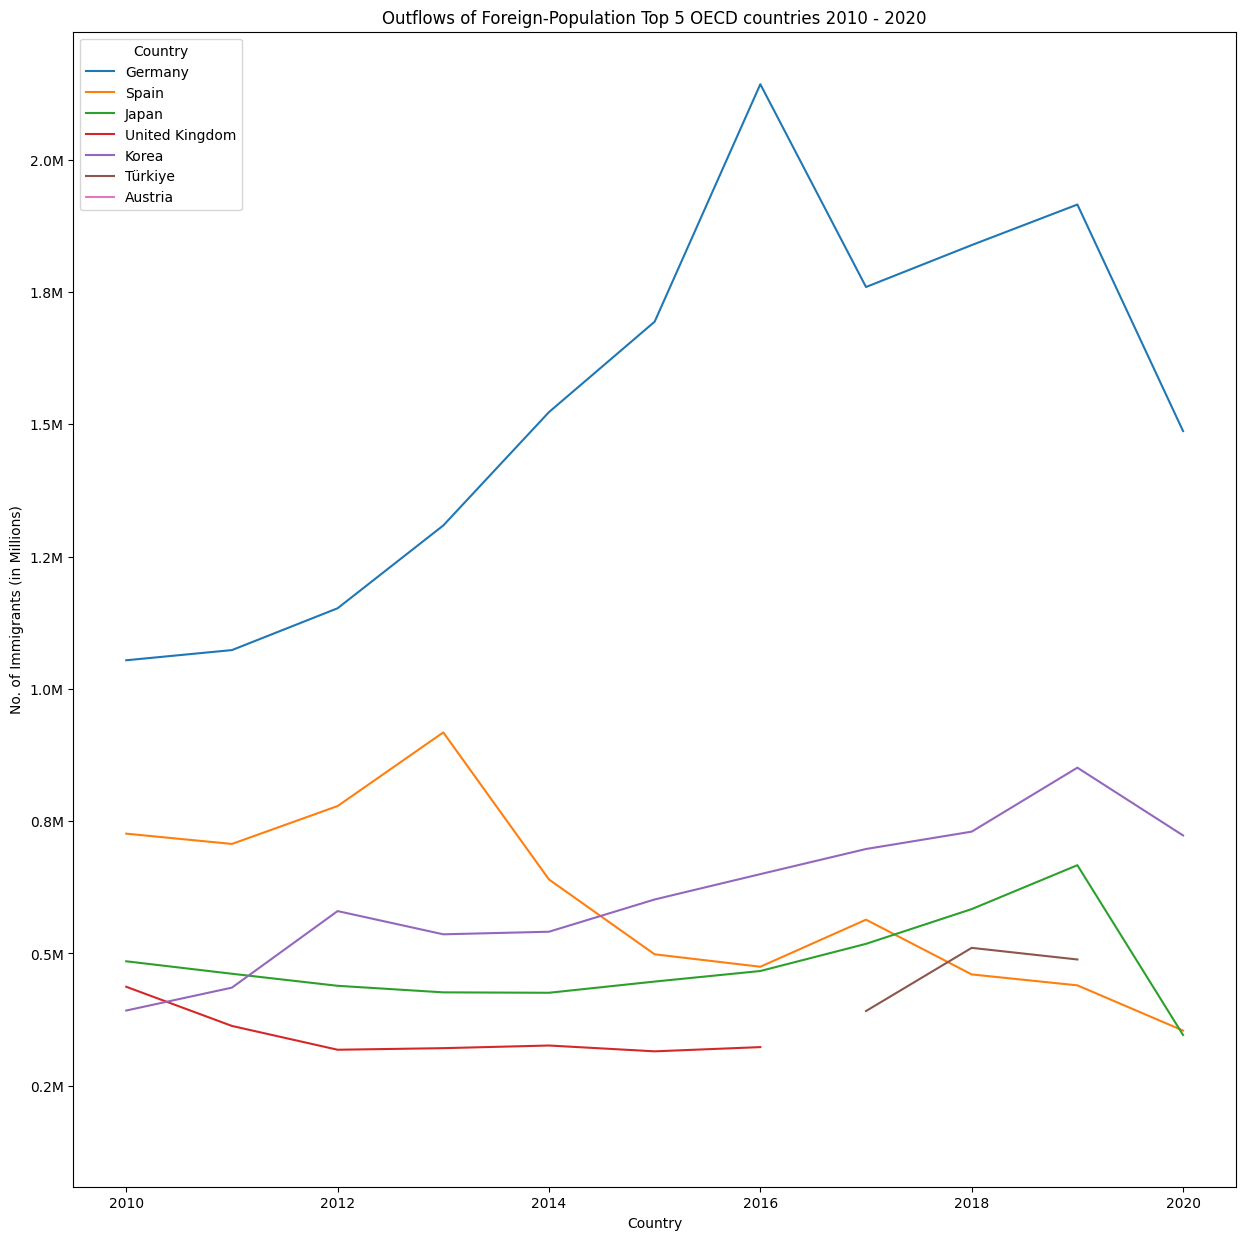

In [81]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(data=result_out, x='Year', y='Value', hue='Country', ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Outflows of Foreign-Population Top 5 OECD countries 2010 - 2020")
plt.show()

How are the nationality acquisition rates behaving?

In [46]:
data['Variable'].value_counts()

Variable
Inflows of foreign population by nationality                   106723
Acquisition of nationality by country of former nationality     97573
Stock of foreign population by nationality                      84693
Outflows of foreign population by nationality                   76475
Stock of foreign-born population by country of birth            74054
Name: count, dtype: int64

In [47]:
data_nat_2010 = top_5(data, 'Acquisition of nationality by country of former nationality', 2010)
data_nat_2010

,,Value
,,sum
Country,Year,
United States,2010,1241956.0
United Kingdom,2010,387181.0
Canada,2010,287136.0
France,2010,286317.0
Spain,2010,247411.0


In [48]:
data_nat_2011 = top_5(data, 'Acquisition of nationality by country of former nationality', 2011)
data_nat_2011

,,Value
,,sum
Country,Year,
United States,2011,1390457.0
Canada,2011,358885.0
United Kingdom,2011,352916.0
Spain,2011,229154.0
France,2011,228997.0


In [49]:
data_nat_2012 = top_5(data, 'Acquisition of nationality by country of former nationality', 2012)
data_nat_2012

,,Value
,,sum
Country,Year,
United States,2012,1516756.0
United Kingdom,2012,386319.0
Spain,2012,231118.0
Canada,2012,223835.0
Germany,2012,221356.0


In [50]:
data_nat_2013 = top_5(data, 'Acquisition of nationality by country of former nationality', 2013)
data_nat_2013

,,Value
,,sum
Country,Year,
United States,2013,1561536.0
Spain,2013,451570.0
United Kingdom,2013,414409.0
Canada,2013,254911.0
Australia,2013,246084.0


In [51]:
data_nat_2014 = top_5(data, 'Acquisition of nationality by country of former nationality', 2014)
data_nat_2014

,,Value
,,sum
Country,Year,
United States,2014,1308379.0
Canada,2014,518479.0
Spain,2014,411753.0
Australia,2014,324900.0
Italy,2014,257844.0


In [52]:
data_nat_2015 = top_5(data, 'Acquisition of nationality by country of former nationality', 2015)
data_nat_2015

,,Value
,,sum
Country,Year,
United States,2015,1461928.0
Canada,2015,502152.0
Italy,2015,353461.0
Australia,2015,272043.0
United Kingdom,2015,235406.0


In [53]:
data_nat_2016 = top_5(data, 'Acquisition of nationality by country of former nationality', 2016)
data_nat_2016

,,Value
,,sum
Country,Year,
United States,2016,1507460.0
Italy,2016,399582.0
Spain,2016,301796.0
United Kingdom,2016,297548.0
Canada,2016,294427.0


In [54]:
data_nat_2017 = top_5(data, 'Acquisition of nationality by country of former nationality', 2017)
data_nat_2017

,,Value
,,sum
Country,Year,
United States,2017,1415753.0
Italy,2017,290750.0
Australia,2017,275489.0
United Kingdom,2017,245604.0
France,2017,229917.0


In [55]:
data_nat_2018 = top_5(data, 'Acquisition of nationality by country of former nationality', 2018)
data_nat_2018

,,Value
,,sum
Country,Year,
United States,2018,1525311.0
Canada,2018,352616.0
United Kingdom,2018,313005.0
Italy,2018,222881.0
Germany,2018,220845.0


In [56]:
data_nat_2019 = top_5(data, 'Acquisition of nationality by country of former nationality', 2019)
data_nat_2019

,,Value
,,sum
Country,Year,
United States,2019,1686592.0
Canada,2019,500357.0
United Kingdom,2019,317722.0
Australia,2019,255322.0
Germany,2019,254000.0


In [57]:
data_nat_2020 = top_5(data, 'Acquisition of nationality by country of former nationality', 2020)
data_nat_2020

,,Value
,,sum
Country,Year,
United States,2020,1256349.0
Australia,2020,409105.0
Italy,2020,261390.0
United Kingdom,2020,259861.0
Spain,2020,252486.0


In [58]:
dfs = [data_nat_2010, data_nat_2011, data_nat_2012, data_nat_2013, data_nat_2014, data_nat_2015, data_nat_2016, data_nat_2017, data_nat_2018, data_nat_2019, data_nat_2020]

result_nat = pd.concat(dfs).reset_index()

result_nat

,Country,Year,Value
,,,sum
0,United States,2010,1241956.0
1,United Kingdom,2010,387181.0
2,Canada,2010,287136.0
3,France,2010,286317.0
4,Spain,2010,247411.0
5,United States,2011,1390457.0
6,Canada,2011,358885.0
7,United Kingdom,2011,352916.0
8,Spain,2011,229154.0


In [59]:
result_nat.columns = result_nat.columns.droplevel(1)

In [60]:
result_nat

,Country,Year,Value
0,United States,2010,1241956.0
1,United Kingdom,2010,387181.0
2,Canada,2010,287136.0
3,France,2010,286317.0
4,Spain,2010,247411.0
5,United States,2011,1390457.0
6,Canada,2011,358885.0
7,United Kingdom,2011,352916.0
8,Spain,2011,229154.0
9,France,2011,228997.0


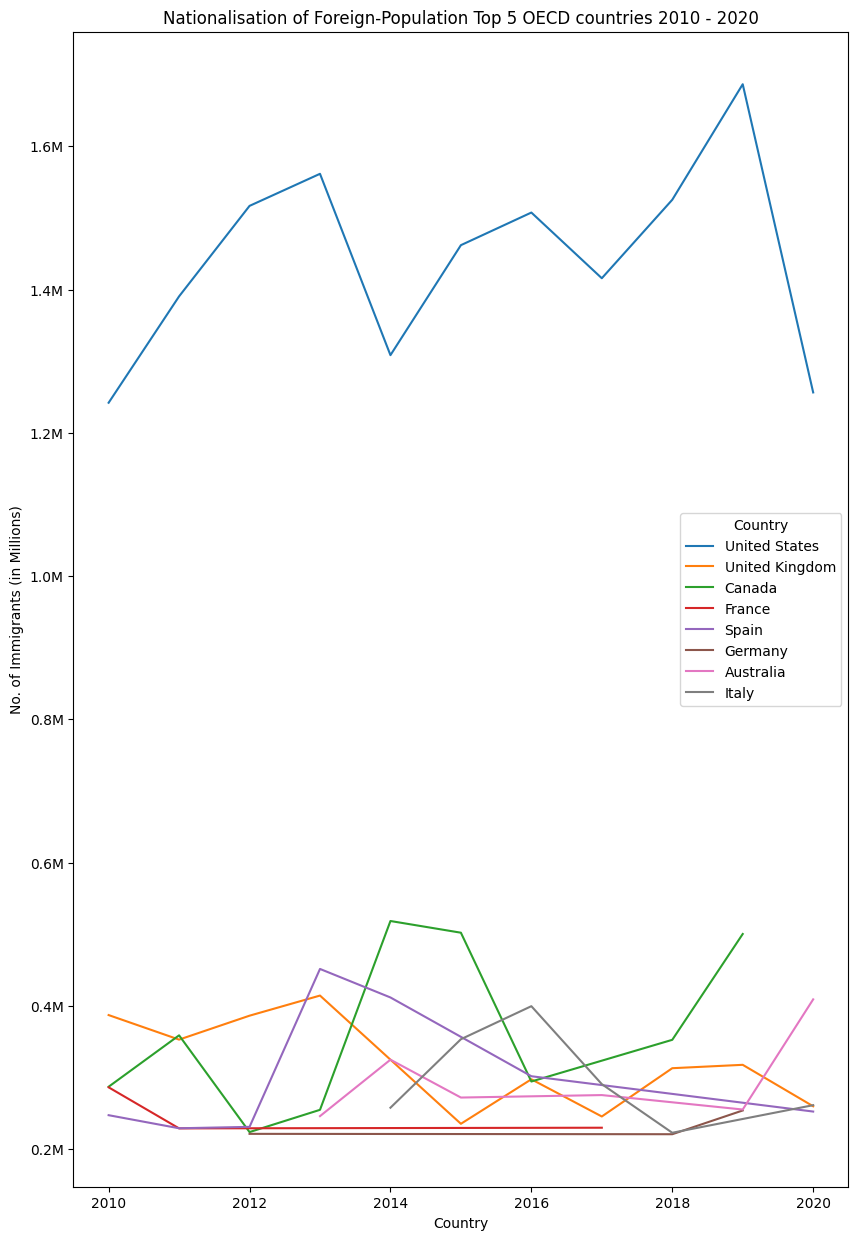

In [82]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(10, 15))
sns.lineplot(data=result_nat, x='Year', y='Value', hue='Country', ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Nationalisation of Foreign-Population Top 5 OECD countries 2010 - 2020")
plt.show()

3. Which are the 5 countries with the biggest number of foreign-born and foreign-population to native population in the OECD? How is the ratio to Local population?


In [62]:
data['Variable'].value_counts()

Variable
Inflows of foreign population by nationality                   106723
Acquisition of nationality by country of former nationality     97573
Stock of foreign population by nationality                      84693
Outflows of foreign population by nationality                   76475
Stock of foreign-born population by country of birth            74054
Name: count, dtype: int64

In [63]:
ratio_immi = data.copy().set_index('Variable')
ratio_immi = ratio_immi.loc[['Stock of foreign-born population by country of birth']]
ratio_immi = ratio_immi[ratio_immi['Year'] == 2019]

ratio_immi

,Country of birth/nationality,VAR,Country,Year,Value
Variable,,,,,
Stock of foreign-born population by country of birth,Afghanistan,B14,Australia,2019,62560.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Austria,2019,43073.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Belgium,2019,24224.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Czech Republic,2019,455.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Denmark,2019,13771.0
...,...,...,...,...,...
Stock of foreign-born population by country of birth,Venezuela,B14,Türkiye,2019,290.0
Stock of foreign-born population by country of birth,Viet Nam,B14,Türkiye,2019,208.0
Stock of foreign-born population by country of birth,Yemen,B14,Türkiye,2019,14778.0


In [64]:
ratio_immi1 = ratio_immi.groupby(['Country', 'Year']).agg({'Value':'sum'})
# ratio_immi1 = ratio_immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
ratio_immi1['Value/2'] = ratio_immi1['Value']/2
ratio_immi1

,,Value,Value/2
Country,Year,,
Australia,2019,15048170.0,7524085.0
Austria,2019,3424318.0,1712159.0
Belgium,2019,3946808.0,1973404.0
Chile,2019,2459206.0,1229603.0
Czech Republic,2019,1012055.0,506027.5
Denmark,2019,1210533.0,605266.5
Estonia,2019,396107.0,198053.5
Finland,2019,773549.0,386774.5
France,2019,16715599.0,8357799.5


In [65]:
data_immi_fbp_2017 = top_5(data, 'Stock of foreign-born population by country of birth', 2017)
data_immi_fbp_2017 

,,Value
,,sum
Country,Year,
United States,2017,87711774.0
Germany,2017,24297000.0
United Kingdom,2017,17976000.0
France,2017,16255915.0
Australia,2017,14262880.0


In [66]:
data_immi_fbp_2018 = top_5(data, 'Stock of foreign-born population by country of birth', 2018)
data_immi_fbp_2018

,,Value
,,sum
Country,Year,
United States,2018,88082062.0
Germany,2018,25014000.0
United Kingdom,2018,18114000.0
France,2018,16433690.0
Australia,2018,14650670.0


In [67]:
data_immi_fbp_2019 = top_5(data, 'Stock of foreign-born population by country of birth', 2019)
data_immi_fbp_2019 

,,Value
,,sum
Country,Year,
United States,2019,88568717.0
Germany,2019,25734000.0
United Kingdom,2019,17745000.0
France,2019,16715599.0
Australia,2019,15048170.0


In [68]:
data_immi_fbp_2020 = top_5(data, 'Stock of foreign-born population by country of birth', 2020)
data_immi_fbp_2020 

,,Value
,,sum
Country,Year,
United States,2020,84279499.0
Germany,2020,26134000.0
United Kingdom,2020,17249000.0
France,2020,16939883.0
Australia,2020,15291750.0


In [69]:
data_immi_fbp_2021 = top_5(data, 'Stock of foreign-born population by country of birth', 2021)
data_immi_fbp_2021 

,,Value
,,sum
Country,Year,
United States,2021,86219000.0
Germany,2021,25921000.0
Australia,2021,15047000.0
Spain,2021,14071000.0
Italy,2021,12513000.0


In [70]:
data_immi_fp_2017 = top_5(data, 'Stock of foreign population by nationality', 2017)
data_immi_fp_2017 

,,Value
,,sum
Country,Year,
United States,2017,44589388.0
Germany,2017,19874120.0
United Kingdom,2017,11803000.0
Italy,2017,10051869.0
France,2017,9405900.0


In [71]:
data_immi_fp_2018 = top_5(data, 'Stock of foreign population by nationality', 2018)
data_immi_fp_2018 

,,Value
,,sum
Country,Year,
United States,2018,22595700.0
Germany,2018,21038255.0
United Kingdom,2018,11414000.0
Italy,2018,10248383.0
Spain,2018,9122818.0


In [72]:
data_immi_fp_2019 = top_5(data, 'Stock of foreign population by nationality', 2019)
data_immi_fp_2019 

,,Value
,,sum
Country,Year,
United States,2019,22518800.0
Germany,2019,21611650.0
Italy,2019,9952597.0
Spain,2019,9677580.0
United Kingdom,2019,6227000.0


In [73]:
data_immi_fp_2020 = top_5(data, 'Stock of foreign population by nationality', 2020)
data_immi_fp_2020 

,,Value
,,sum
Country,Year,
Germany,2020,22223395.0
United States,2020,21433675.0
Spain,2020,10451454.0
Italy,2020,10040524.0
Japan,2020,5866220.0


In [74]:
data_immi_fp_2021 = top_5(data, 'Stock of foreign population by nationality', 2021)
data_immi_fp_2021 

,,Value
,,sum
Country,Year,
Germany,2021,22615000.0
United States,2021,22165000.0
Spain,2021,10462000.0
Italy,2021,10285000.0
Japan,2021,5767000.0


In [75]:
data_immi_fp_2021.columns = data_immi_fp_2021.columns.droplevel(1)

In [76]:
data_immi_fp_2021.columns

Index(['Value'], dtype='object')

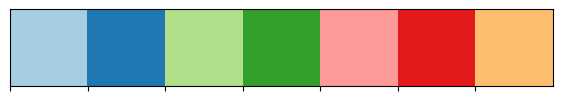

In [77]:
custom_palette = sns.color_palette("Paired", 7)
sns.palplot(custom_palette)

Graph

C:\Users\chech\AppData\Local\Temp\ipykernel_28500\715764603.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y= 'Value', data= data_immi_fp_2021, palette=custom_palette, ax=ax)
C:\Users\chech\AppData\Local\Temp\ipykernel_28500\715764603.py:11: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x='Country', y= 'Value', data= data_immi_fp_2021, palette=custom_palette, ax=ax)


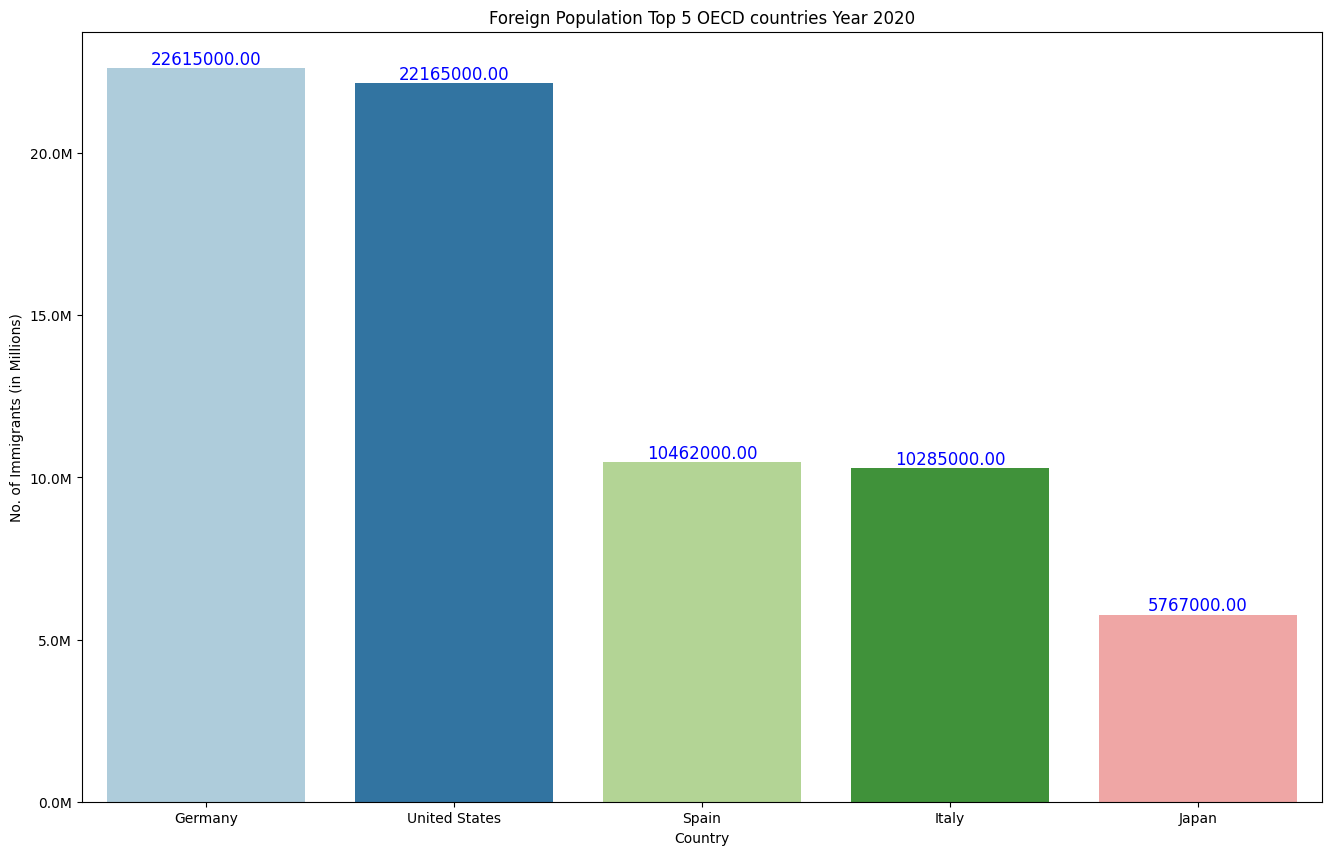

In [78]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots( figsize=(16,10))
sns.barplot(x='Country', y= 'Value', data= data_immi_fp_2021, palette=custom_palette, ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Foreign Population Top 5 OECD countries Year 2020")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

In [84]:
%%writefile functions.py

import pandas as pd
import numpy as np

def top_5(data: pd.DataFrame, variable: str, year: int=2010)-> pd.DataFrame:

    """"
    This function inputs a data frame, a year from 2010 until 20121, and variable = 'Inflows of foreign population by nationality', 'Acquisition of nationality by country of former nationality',
    'Stock of foreign population by nationality', 'Outflows of foreign population by nationality', 'Stock of foreign-born population by country of birth'    
    Depending on Gender and the year selected the function returns a data frame 
    including the columns = 'Country', 'Year', and 'Value' corresponding to
    every single country included in the data frame  and its total number of immigrants per year.

    """

    immi = data.copy().set_index('Variable')
    immi = immi.loc[[variable]]
    immi = immi[immi['Year'] == year]

       

    max_immi1 = immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
            

    max_immi2 = max_immi1.sort_values(by = ('Value', 'sum'), ascending=False).iloc[0:5]
    max_immi2

    

    return max_immi2

Overwriting functions.py
